<a href="https://colab.research.google.com/github/rrizwan98/Fashion_mnist_Classification/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/fashionmnist.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('raza')

raza


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt

from tensorflow import keras
layers = keras.layers
models = keras.models


In [ ]:
fashion_train=pd.read_csv('fashion-mnist_train.csv')
fashion_test=pd.read_csv('fashion-mnist_test.csv')


In [ ]:
train_image=fashion_train.iloc[:,1:]
train_lable=fashion_train.iloc[:,0]
test_image=fashion_test.iloc[:,1:]
test_lable=fashion_test.iloc[:,0]
test_lable

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [ ]:
#train_image.astype(np.int8)
#train_lable.astype(np.int8)
#test_image.astype(np.int8)
#test_lable.astype(np.int8)

In [ ]:
img_row=28
img_col=28
input_shape=(img_row,img_col,1)

train_image=train_image.values.reshape(train_image.shape[0], img_row , img_col,1)
train_image=train_image.astype('float32')
train_image/=255

test_image=test_image.values.reshape(test_image.shape[0],img_row , img_col ,1)
test_image=test_image.astype('float32')
test_image/=255


In [ ]:
# CNN Model
model=models.Sequential()
model.add(Conv2D(64,(3,3), activation='relu',input_shape=(input_shape)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten(input_shape=(28, 28)))

model.add(layers.Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history= model.fit(train_image,train_lable,epochs=22,batch_size=150,validation_split=0.1)
y_score = model.predict_proba(test_image)

Epoch 1/22
360/360 [==============================] - 2s 4ms/step - loss: 0.7071 - acc: 0.7431 - val_loss: 0.4410 - val_acc: 0.8363
Epoch 2/22
360/360 [==============================] - 1s 4ms/step - loss: 0.4510 - acc: 0.8378 - val_loss: 0.3741 - val_acc: 0.8655
Epoch 3/22
360/360 [==============================] - 1s 4ms/step - loss: 0.3930 - acc: 0.8589 - val_loss: 0.3400 - val_acc: 0.8817
Epoch 4/22
360/360 [==============================] - 1s 4ms/step - loss: 0.3617 - acc: 0.8696 - val_loss: 0.3105 - val_acc: 0.8885
Epoch 5/22
360/360 [==============================] - 1s 4ms/step - loss: 0.3419 - acc: 0.8782 - val_loss: 0.3036 - val_acc: 0.8878
Epoch 6/22
360/360 [==============================] - 1s 4ms/step - loss: 0.3243 - acc: 0.8833 - val_loss: 0.2874 - val_acc: 0.8985
Epoch 7/22
360/360 [==============================] - 1s 4ms/step - loss: 0.3079 - acc: 0.8894 - val_loss: 0.2862 - val_acc: 0.9013
Epoch 8/22
360/360 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
model.evaluate(test_image,test_lable,\
               batch_size=150,verbose=2)


67/67 - 0s - loss: 0.2264 - acc: 0.9182


[0.22642451524734497, 0.9182000160217285]

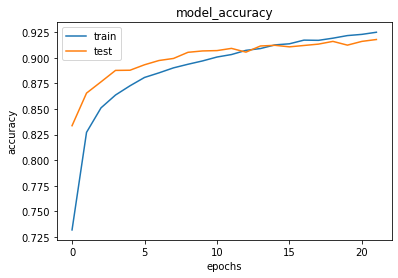

In [ ]:
# Summarize the history of accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train' , 'test'], loc='upper left')
plt.show()

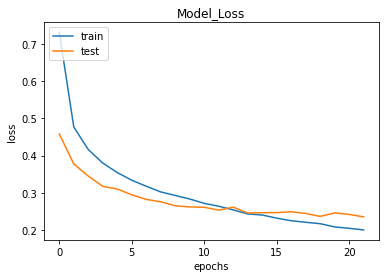

In [ ]:
#summary the history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train' , 'test'], loc='upper left')
plt.show()

In [ ]:
print('Id \t prediction \t Actual Lable \n')
for i in range(10):
  prediction=model.predict(np.array([test_image[i]]))
  predicted_label = test_lable[np.argmax(prediction)]
  actual_lable=test_lable[i]
  print(i,"\t", predicted_label,'\t', actual_lable)
  

Id 	 prediction 	 Actual Lable 

0 	 0 	 0
1 	 1 	 1
2 	 2 	 2
3 	 8 	 2
4 	 2 	 3
5 	 8 	 2
6 	 5 	 8
7 	 8 	 6
8 	 2 	 5
9 	 0 	 0


In [ ]:

from tensorflow .keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def build_model():
  model=models.Sequential()
  model.add(Conv2D(64,(3,3), activation='relu',input_shape=(input_shape)))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Flatten(input_shape=(28, 28)))

  model.add(layers.Dense(128,activation='relu'))
  model.add(Dropout(0.5))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  return model

classifier=KerasClassifier(build_fn=build_model,batch_size=150,epochs=20)
accuracy=cross_val_score(estimator=classifier, X=train_image,y=train_lable,cv=10,n_jobs=-1)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
accuracy.mean()

0.9132166683673859

In [ ]:
from sklearn.model_selection import cross_val_predict
def build_model():
  model=models.Sequential()
  model.add(Conv2D(64,(3,3), activation='relu',input_shape=(input_shape)))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Flatten(input_shape=(28, 28)))

  model.add(layers.Dense(128,activation='relu'))
  model.add(Dropout(0.5))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  return model

classifier=KerasClassifier(build_fn=build_model,batch_size=32,epochs=15)
accuracy=cross_val_predict(estimator=classifier, X=train_image,y=train_lable,cv=10)


Epoch 1/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6003 - acc: 0.7816
Epoch 2/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3981 - acc: 0.8569
Epoch 3/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3511 - acc: 0.8731
Epoch 4/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3168 - acc: 0.8846
Epoch 5/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2950 - acc: 0.8920
Epoch 6/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2747 - acc: 0.8989
Epoch 7/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2612 - acc: 0.9029
Epoch 8/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2492 - acc: 0.9081
Epoch 9/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2360 - acc: 0.9124
Epoch 10/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2279 - acc: 0.9143
Epoch 11/15
1688/1688 [======

In [ ]:
accuracy

array([4, 9, 4, ..., 8, 8, 7])

In [ ]:
# one hot encoder
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#test_lable_encoded=le.fit_transform(test_lable)
#sample_pridiction_encoded=le.fit_transform(sample_pridiction)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report



In [ ]:
#confusion matrix 
confusion_matrix(train_lable,accuracy)
classification_report(train_lable,accuracy)

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.86      6000\n           1       0.99      0.98      0.99      6000\n           2       0.87      0.86      0.87      6000\n           3       0.91      0.92      0.92      6000\n           4       0.84      0.87      0.86      6000\n           5       0.99      0.98      0.98      6000\n           6       0.77      0.72      0.75      6000\n           7       0.96      0.97      0.96      6000\n           8       0.98      0.98      0.98      6000\n           9       0.97      0.96      0.97      6000\n\n    accuracy                           0.91     60000\n   macro avg       0.91      0.91      0.91     60000\nweighted avg       0.91      0.91      0.91     60000\n'

In [ ]:
#Precision_score
precision_score(train_lable,accuracy,average='micro')*100
# REcall_score
recall_score(train_lable,accuracy,average='micro')
# F1 Scoring
f1_score(train_lable,accuracy,average='micro')

0.9142833333333332

In [ ]:
# summarize the Presicion_Recall_Curve Score

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lb = LabelBinarizer()
lb.fit(train_lable)
y_train_lable = lb.transform(train_lable)
y_accuracy = lb.transform(accuracy)
roc_auc_score(y_train_lable, y_accuracy, average="macro")



0.9523796296296296